什么是插值？

在数学的数值分析领域中，插值（英语：interpolation）是一种通过已知的、离散的数据点，在范围内推求新数据点的过程或方法。

简单来说插值是一种在给定的点之间生成点的方法。

例如：对于两个点 1 和 2，我们可以插值并找到点 1.33 和 1.66。

插值有很多用途，在机器学习中我们经常处理数据缺失的数据，插值通常可用于替换这些值。

这种填充值的方法称为插补。

除了插补，插值经常用于我们需要平滑数据集中离散点的地方。

如何在 SciPy 中实现插值？
SciPy 提供了 scipy.interpolate 模块来处理插值。

一维插值
一维数据的插值运算可以通过方法 interp1d() 完成。
该方法接收两个参数 x 点和 y 点。

返回值是可调用函数，该函数可以用新的 x 调用并返回相应的 y，y = f(x)。

对给定的 xs 和 ys 插值，从 2.1、2.2... 到 2.9：

In [3]:
from scipy.interpolate import interp1d
import numpy as np

xs=np.arange(10)
ys=2*xs+1

inerp_func=interp1d(xs,ys)
newarr=inerp_func(np.arange(2.1,3,0.1))
# 2.1、2.2、2.3、2.4、2.5、2.6、2.7、2.8和2.9    *2 +1
print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


注意：新的 xs 应该与旧的 xs 处于相同的范围内，这意味着我们不能使用大于 10 或小于 0 的值调用 interp_func()。

单变量插值
在一维插值中，点是针对单个曲线拟合的，而在样条插值中，点是针对使用多项式分段定义的函数拟合的。

单变量插值使用 UnivariateSpline() 函数，该函数接受 xs 和 ys 并生成一个可调用函数，该函数可以用新的 xs 调用。

分段函数，就是对于自变量 x 的不同的取值范围，有着不同的解析式的函数。

为非线性点找到 2.1、2.2...2.9 的单变量样条插值：

确实，在使用 UnivariateSpline 对一维数据进行插值时，它与 interp1d 的作用非常相似，因为它们都采用了基于样条函数的插值方法。

但是，它们之间存在一些差异。主要的区别是 UnivariateSpline 可以提供平滑的曲线，而 interp1d 在没有额外指定参数的情况下可能会出现折线形状的插值结果。此外，UnivariateSpline 还可以通过调整平滑度参数来控制插值结果的平滑度。

总之，虽然 UnivariateSpline 和 interp1d 在实现上有些不同，但它们都是一维插值的常用方法，并且在处理一些简单的插值问题时它们的表现类似。

In [5]:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs=np.arange(10)
ys=xs**2+np.sin(xs)+1 # np.sin(xs) 中使用的是弧度而非角度

interp_func=UnivariateSpline(xs,ys)

newarr=interp_func(np.arange(2.1,3,0.1))
print(newarr)

[5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


径向基函数插值
径向基函数是对应于固定参考点定义的函数。

曲面插值里我们一般使用径向基函数插值。

Rbf() 函数接受 xs 和 ys 作为参数，并生成一个可调用函数，该函数可以用新的 xs 调用。

In [7]:
from scipy.interpolate import Rbf
import numpy as np

xs=np.arange(10)
ys=xs**2+np.sin(xs)+1

interp_func=Rbf(xs,ys)

newarr=inerp_func(np.arange(2.1, 3, 0.1))
print(newarr)

[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


虽然 Rbf 和 UnivariateSpline 都是用于一维数据的插值函数，但它们的内部实现方式是不同的，因此在使用它们进行插值时，得到的结果也可能会不同。

具体来说，UnivariateSpline 是一个样条插值函数，它通过对输入的数据进行样条拟合来估计一个连续的函数，因此它的插值结果通常比较平滑，并且对噪声和离群点的影响较小。

而 Rbf 则是一个径向基函数插值函数，它使用了一组径向基函数来构建一个线性组合函数，以逼近原始数据，因此它的插值结果可能会比较“锯齿状”，并且对噪声和离群点的影响较大。

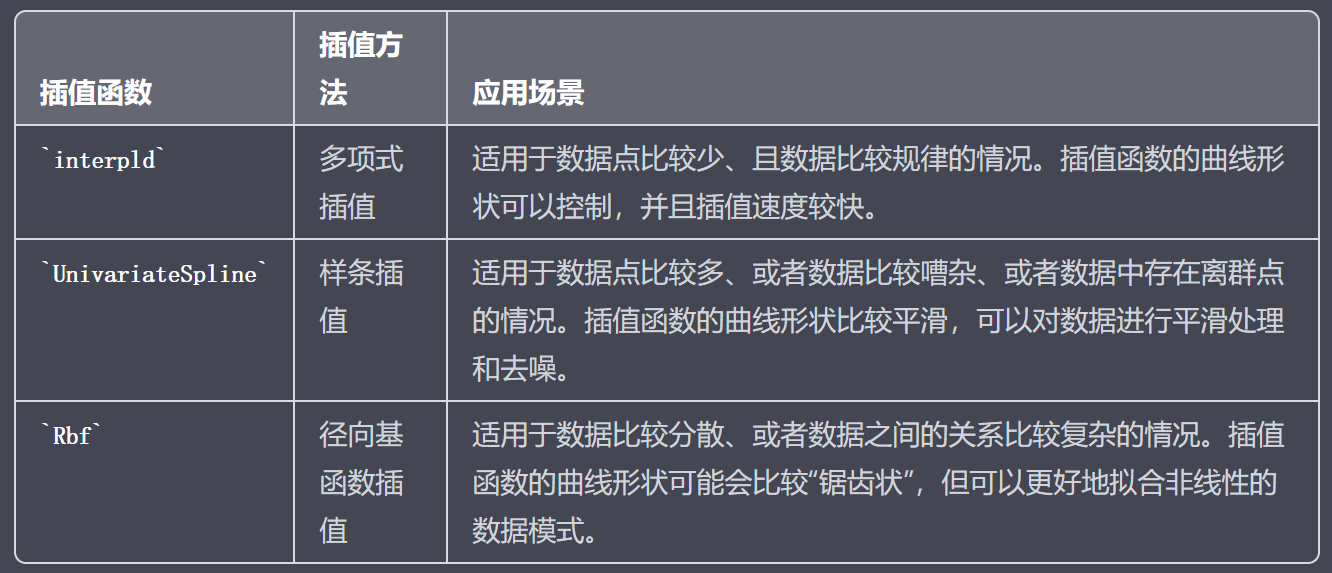